# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

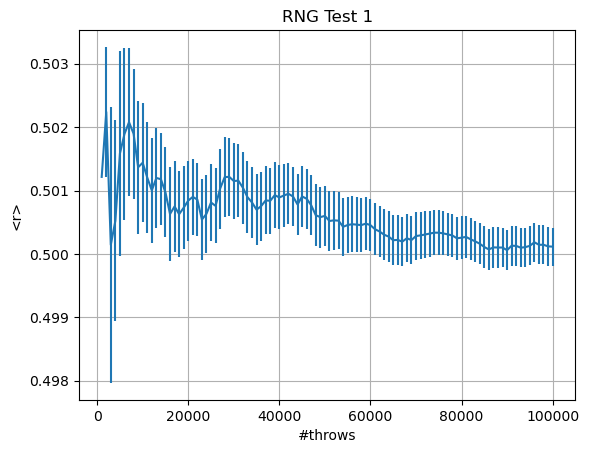

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the file into a pandas DataFrame
AvgR = pd.read_csv('1.1/Avg.dat', header=None, sep='   ', engine='python')

# Extract the values and errors as separate Series
Avg = AvgR[0].tolist()
AvgSig = AvgR[1].tolist()

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange( 1, len(Avg)+1)       # [1,2,...,N]
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x, Avg, yerr=AvgSig)
plt.xlabel('#throws')
plt.ylabel('<r>')
plt.title('RNG Test 1')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

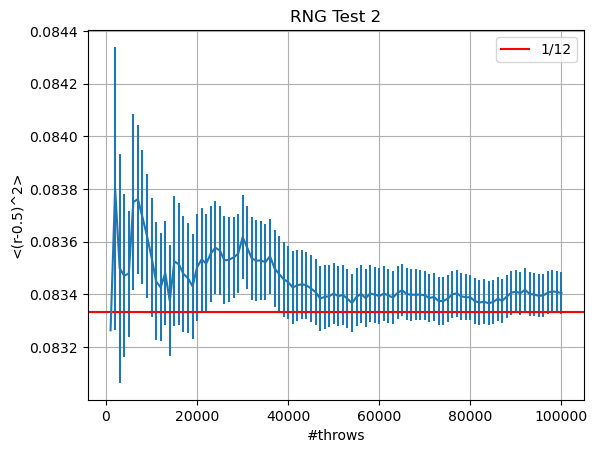

In [2]:
Sig2R = pd.read_csv('1.1/Sig2.dat', header=None, sep='   ', engine='python')

Sig2 = Sig2R[0].tolist()
Sig2Sig = Sig2R[1].tolist()

plt.errorbar(x, Sig2, yerr=Sig2Sig)
plt.axhline( y=1/12, color='r', label= '1/12')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>')
plt.title('RNG Test 2')
plt.grid(True)
plt.show()


3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

Text(0.5, 1.0, '$\\chi^2_j$')

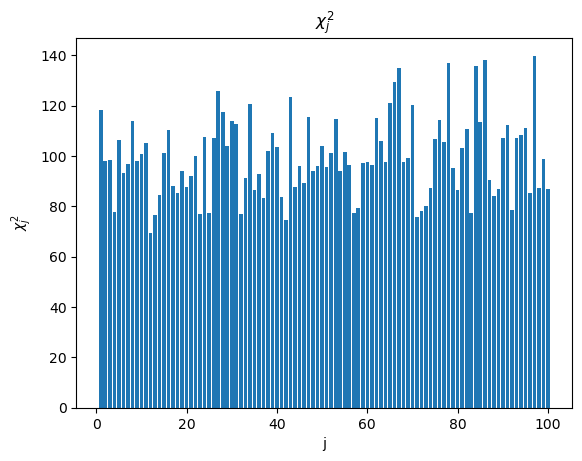

In [3]:
Chi2 = pd.read_csv('1.1/Chi2.dat', header=None)
x = np.arange( 1, len(Chi2)+1)       # [1,2,...,N]

# Plot the histogram using plt.bar()
plt.bar(x, Chi2[0].tolist())

# Add labels to the x- and y-axes
plt.xlabel('j')
plt.ylabel('$\chi^2_j$')
plt.title('$\chi^2_j$')


### Results
We get values of $\sigma^2$ and $\langle r \rangle$ that are inside a staandard deviation from what we expcted, so they are completely compatible. The $\chi^2_j$ vary quite a bit around 100, going fro  65 to almost 140. Checking the true probability distributions though we see that our results appear to abe accaptable.


### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

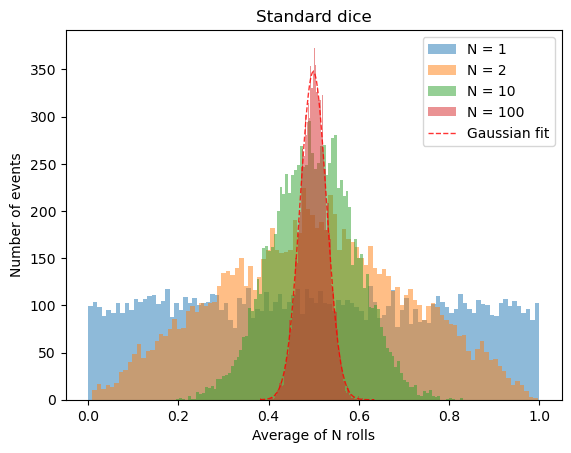

In [4]:
from scipy.stats import norm
from scipy.optimize import curve_fit

Nbins = 100

St1 = pd.read_csv('1.2/St1.dat', header=None)
St2 = pd.read_csv('1.2/St2.dat', header=None)
St10 = pd.read_csv('1.2/St10.dat', header=None)
St100 = pd.read_csv('1.2/St100.dat', header=None)

plt.hist(St1[0].tolist(), bins=Nbins, alpha=0.5, label='N = 1')
plt.hist(St2[0].tolist(), bins=Nbins, alpha=0.5, label='N = 2')
plt.hist(St10[0].tolist(), bins=Nbins, alpha=0.5, label='N = 10')

# Create a histogram
counts, bins, _ = plt.hist(St100[0].tolist(), bins=Nbins, alpha=0.5, label='N = 100')

# Define the function to fit (a Gaussian)
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Initial guess for the parameters
p0 = [1.0, 10.0, 2.0]

# Fit the function to the histogram
popt, pcov = curve_fit(gaussian, bins[:-1], counts, p0=p0, maxfev=10000)

# Create an x-axis for the fitted function
x = np.linspace(min(bins), max(bins), 1000)

# Evaluate the fitted function at the x-axis points
y = gaussian(x, *popt)

# Plot the histogram and the fitted function
plt.plot(x, y, 'r--', linewidth=1, alpha=0.8, label='Gaussian fit')

plt.xlabel('Average of N rolls')
plt.ylabel('Number of events')
plt.title('Standard dice')
plt.legend()

plt.show()

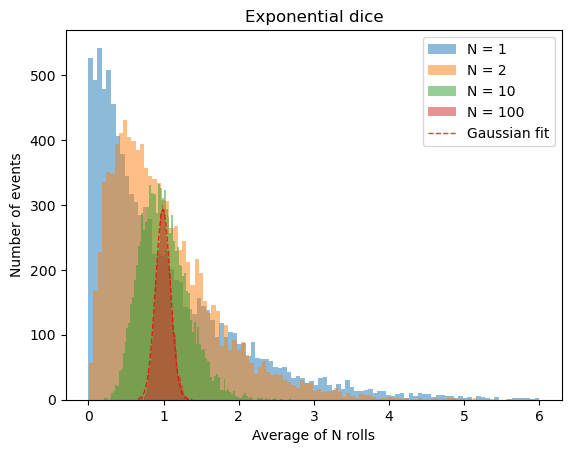

In [5]:
Ex1 = pd.read_csv('1.2/Ex1.dat', header=None)
Ex2 = pd.read_csv('1.2/Ex2.dat', header=None)
Ex10 = pd.read_csv('1.2/Ex10.dat', header=None)
Ex100 = pd.read_csv('1.2/Ex100.dat', header=None)

plt.hist(Ex1[0].tolist(), bins=Nbins, range=[0, 6], alpha=0.5, label='N = 1')
plt.hist(Ex2[0].tolist(), bins=Nbins, alpha=0.5, label='N = 2')
plt.hist(Ex10[0].tolist(), bins=Nbins, alpha=0.5, label='N = 10')

# Create a histogram
counts, bins, _ = plt.hist(Ex100[0].tolist(), bins=Nbins, alpha=0.5, label='N = 100')

# Initial guess for the parameters
p0 = [1.0, 10.0, 2.0]

# Fit the function to the histogram
popt, pcov = curve_fit(gaussian, bins[:-1], counts, p0=p0, maxfev=10000)

# Create an x-axis for the fitted function
x = np.linspace(min(bins), max(bins), 1000)

# Evaluate the fitted function at the x-axis points
y = gaussian(x, *popt)

# Plot the histogram and the fitted function
plt.plot(x, y, 'r--', linewidth=1, alpha=0.8, label='Gaussian fit')

plt.xlabel('Average of N rolls')
plt.ylabel('Number of events')
plt.title('Exponential dice')
plt.legend()

plt.show()

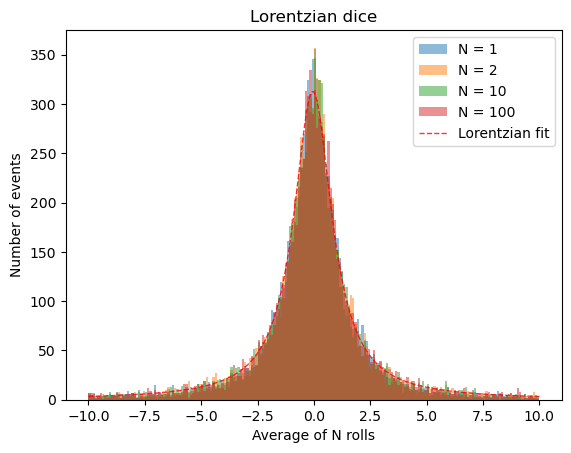

In [6]:
Lo1 = pd.read_csv('1.2/Lo1.dat', header=None)
Lo2 = pd.read_csv('1.2/Lo2.dat', header=None)
Lo10 = pd.read_csv('1.2/Lo10.dat', header=None)
Lo100 = pd.read_csv('1.2/Lo100.dat', header=None)

Nbins=200

plt.hist(Lo1[0].tolist(), bins=Nbins, range=[-10, 10], alpha=0.5, label='N = 1')
plt.hist(Lo2[0].tolist(), bins=Nbins, range=[-10, 10], alpha=0.5, label='N = 2')
plt.hist(Lo10[0].tolist(), bins=Nbins, range=[-10, 10], alpha=0.5, label='N = 10')

# Create a histogram
counts, bins, _ = plt.hist(Lo100[0].tolist(), bins=Nbins, range=[-10, 10], alpha=0.5, label='N = 100')

# Define the function to fit (a Lorentzian)
def lorentzian(x, a, b, c):
    return a * b /( (x - c)**2 + b**2 )

# Initial guess for the parameters
p0 = [1.0, 10.0, 2.0]

# Fit the function to the histogram
popt, pcov = curve_fit(lorentzian, bins[:-1], counts, p0=p0, maxfev=10000)

# Create an x-axis for the fitted function
x = np.linspace(min(bins), max(bins), 1000)

# Evaluate the fitted function at the x-axis points
y = lorentzian(x, *popt)

# Plot the histogram and the fitted function
plt.plot(x, y, 'r--', linewidth=1, alpha=0.8, label='Lorentzian fit')

plt.xlabel('Average of N rolls')
plt.ylabel('Number of events')
plt.title('Lorentzian dice')
plt.legend()

plt.show()

### Results
As expected, as N grows larger the histogram looks more and more like a gaussian, execept for the Lorentzian dice. This is because the central limit theorem is not applicable to the Chauchy-Lorentz distribution, since its second moment is not finite.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

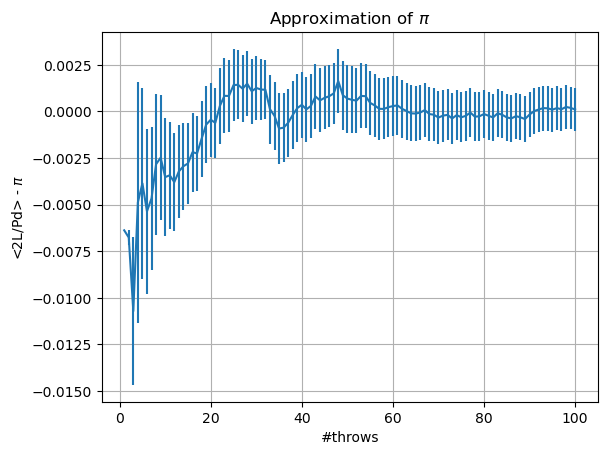

In [7]:
PiR = pd.read_csv('1.3/Pi.dat', header=None, sep='   ', engine='python')

Pi = PiR[0].tolist()
PiErr = PiR[1].tolist()

x = np.arange( 1, len(Pi)+1)      

plt.errorbar(x, [val - math.pi for val in Pi], yerr=PiErr)
plt.xlabel('#throws')
plt.ylabel('<2L/Pd> - $\pi$')
plt.title('Approximation of $\pi$')
plt.grid(True)
plt.show()

### Results
We model the problem in the following way: given $L$ and $d$, whether the needle intersects one of the lines depends on two things: the position of the center of the needle relative to the two lines and the orientation of the needle. The position of the centre is easy to siulate: it is enough to generate a random number $p$ with a flat distribution in $(0, d)$. Randomly generating the orientation of the needle proves more difficult without using $\pi$, since it rules out writing $cos(\pi r)$, with $r$ randomly generated in (0,1]. Even if we considered $y = cos(\pi x)$ and tried to find the probability distribution of $y$, we would need to use $\pi$, since $dy/dx$ gives us a factor $\pi$. The solution used here consists in randomly generating numbers inside the circumference centered in $(0,0)$ with radius $1/2$. To do we generate points evenly distributed in $[-1/2, 1/2]X[-1/2, 1/2]$, until we get one with a distance $r$ from the center inferior to $1/2$. Then we can easily get $cos\theta=x/r$ with $\theta$ evenly distributed in $(0,2\pi]$. Having generated the $cos\theta$ of the angle $\theta$ between the point of the needle and the line passing through the center of the needle it is easy to check if the needle falls on a line: if $|d - p| < |Lcos\theta|$ it is a hit. As we can see, our result is comatible with the real value of $\pi$.